# Haberman Cancer Survival dataset

The notebook covers on below topics:
    * About the dataset 
    * Bi-Variate Analysis: 2-d plot, pair-plot
    * Univariate Analysis: Histograms, PDF, CDF
    * Central tendency: Mean, Median, Standard deviation
    * Percentile, Quartiles, Boxplot, Violin plot


**(1). About the dataset**

Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
* Age of patient at the time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) 
    * 1 = the patient survived 5 years or longer
    * 2 = the patient died within 5 years

**Task:** To find wether the patient has survived or no. But in this we do EDA only.

In [1]:
# Import required libraries
import pandas as pd #reading datafiles
import numpy as np #numerical array computations
import matplotlib.pyplot as plt #plotting library
import seaborn as sns

df = pd.read_csv("/kaggle/input/habermans-survival-data-set/haberman.csv", names=["Age", "Year", "#Of axillary nodes", "Survival Status"], header=None)

In [2]:
# (Q) How many samples and features have in this data?
df.shape

(306, 4)

Data contains 306 rows and 4 features.

In [3]:
# (Q) How many Patients are there for each class
df["Survival Status"].value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

Out of 306 samples, we have 225 patients who are survived and 81 patients who are died with in 5 years of post-operation.

In [4]:
df["Survival Status"].value_counts(normalize=True)*100

1    73.529412
2    26.470588
Name: Survival Status, dtype: float64

As the percentage of each class is different like 73.52 & 26.47. The dataset is imbalanced dataset.

**(2). Bi-Variate Analysis: 2-d plot, pair-plot**

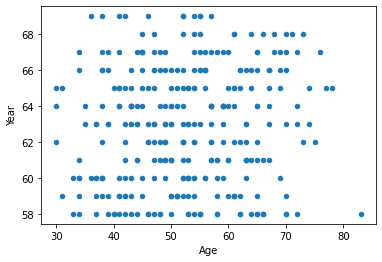

In [5]:
df.plot(kind="scatter", x="Age", y="Year")

* The patient age starts at 30 and operations took place from the year of 1958.
* The above 2-d plot doesnot make sense, So what if we change the color of the points based on the survival status

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


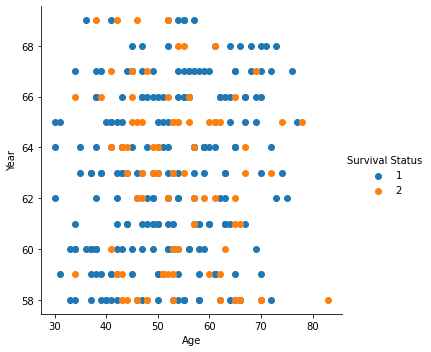

In [6]:
sns.FacetGrid(df, hue="Survival Status", size=5)\
    .map(plt.scatter, "Age", "Year") \
    .add_legend()

* As points are jumbled, we cant make much sense of these 2 features.
* Instead of plotting multiple pairplots manually, we can use the seaborn pair-plot feature.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


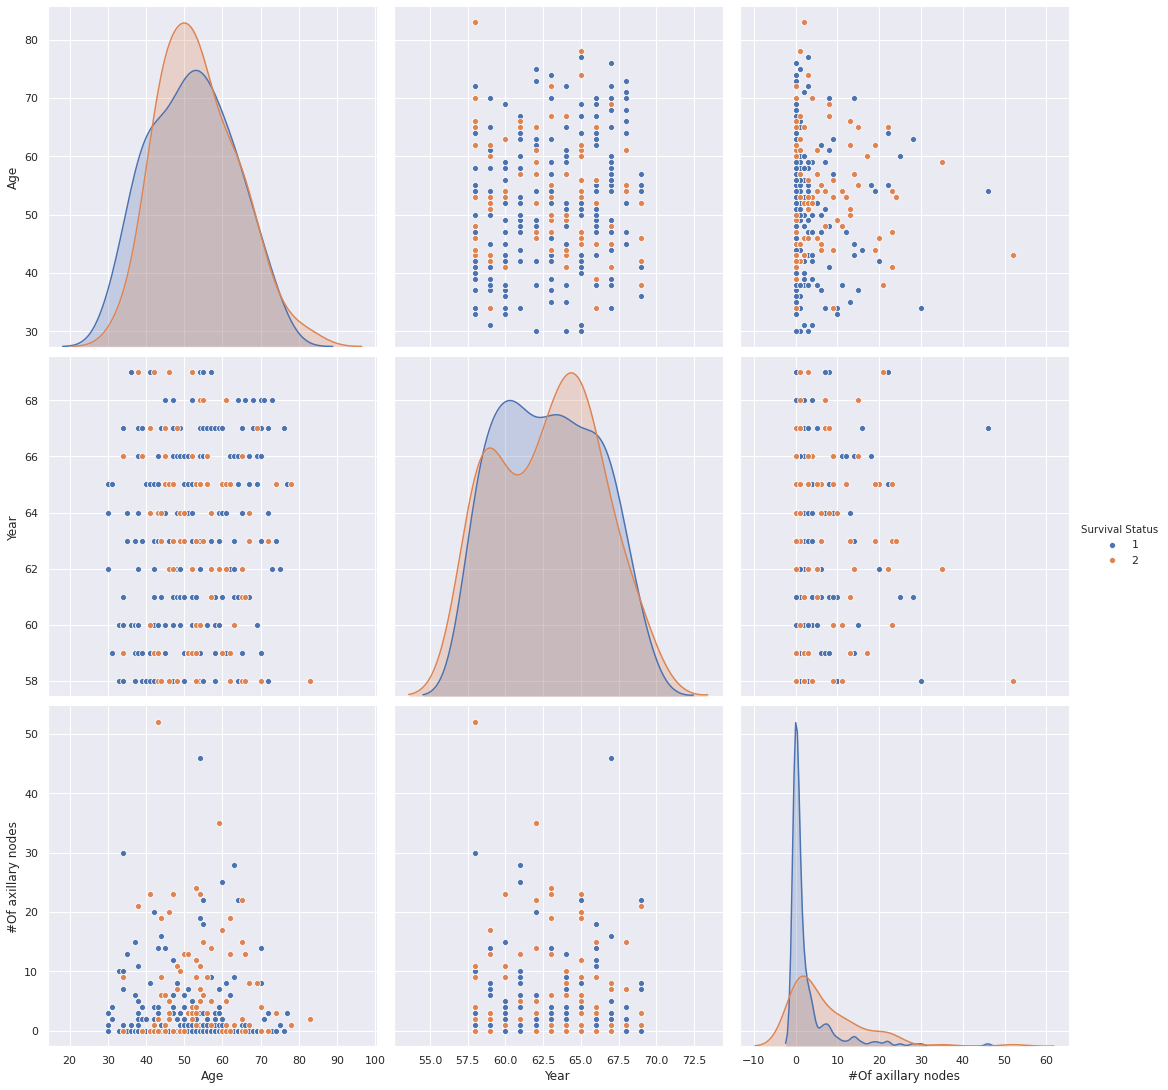

In [7]:
sns.set()
sns.pairplot(df, hue="Survival Status", size=5)

* The diagonal plots are histograms and we discuss more about on later
* THe plot above the dagonal and below the are just mirror images of plots
* All the features are not well seperated. Hence it is difficult to predict the survival status by using simple model.

**(3). Univariate Analysis: Histograms, PDF, CDF**

In [8]:
# lets seperate the data based on the survival status
survived = df[df["Survival Status"] == 1]
non_survived = df[df["Survival Status"] == 2]

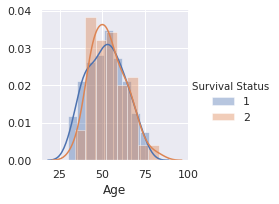

In [9]:
# Lets see how the distribution of each feature is
sns.set()
sns.FacetGrid(df, hue="Survival Status") \
    .map(sns.distplot, "Age") \
    .add_legend()

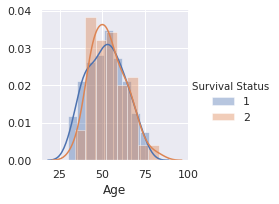

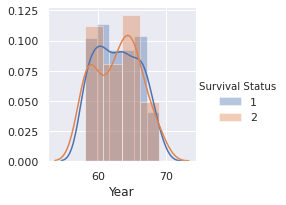

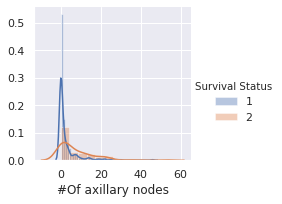

In [10]:
sns.set()
for counter, feature in enumerate(list(df.columns[:-1])):
    sns.FacetGrid(df, hue="Survival Status")\
        .map(sns.distplot, feature)\
        .add_legend()
plt.show()

The distribution plot tells you the distribution of each feature. The Age and Year features are overlapped massively.

> observation:
The more number of auxillary nodes, have the more survival rate

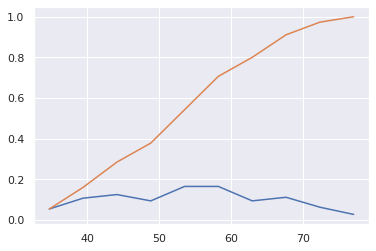

In [11]:
# Histogram: it tells you the number of values in the each bin/window and how frequent the value occurs.
# on x-axis we plot the bins and on y-axis we plot count of the values
counts, bin_edges = np.histogram(survived["Age"], bins=10, density=True)
#plt.plot(bin_edges[1:], counts)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

Observation: The age b/w 50-60 yrs have more survival rate.

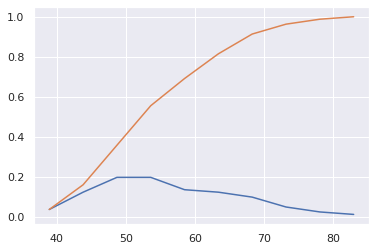

In [12]:
counts, bin_edges = np.histogram(non_survived["Age"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

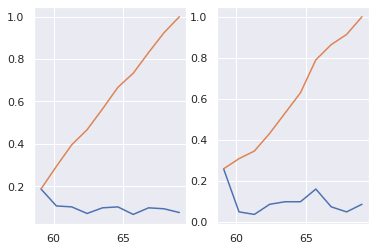

In [13]:
counts, bin_edges = np.histogram(survived["Year"], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.subplot(1, 2, 2)
counts, bin_edges = np.histogram(non_survived["Year"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

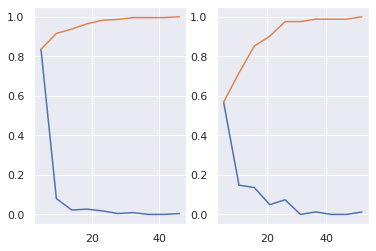

In [14]:
counts, bin_edges = np.histogram(survived["#Of axillary nodes"], bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.subplot(1, 2, 2)
counts, bin_edges = np.histogram(non_survived["#Of axillary nodes"], bins=10, density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

**Observation:** 80% of people survived with having less than 10 axillary nodes. The more number of axillary nodes having the less chance of survival rate.

**(4). Central tendency: Mean, Median, Standard deviation**

In [15]:
# Mean: sum of abservations/total number of observations
# Median: The middle value od sorted observations
# Variance: The average of squared differences from the mean
# Standard deviation: Square root of variance.

print("*" * 100)
print("Means: ")
print("Average age of Survived people", np.mean(survived["Age"]))
print("Average age of non-survived people", np.mean(non_survived["Age"]))

print("*" * 100)
print("Standard Deviations: ")
print(np.std(survived["Age"]))
print(np.std(non_survived["Age"]))

print("*" * 100)
print("Medians: ")
print(np.median(survived["Age"]))
print(np.median(non_survived["Age"]))


****************************************************************************************************
Means: 
Average age of Survived people 52.01777777777778
Average age of non-survived people 53.67901234567901
****************************************************************************************************
Standard Deviations: 
10.98765547510051
10.10418219303131
****************************************************************************************************
Medians: 
52.0
53.0


**(5). Percentile, Quartiles, Boxplot, Violin plot**

In [16]:
# Percentiles: It is mainly used for comparision.
# Lets say you have 25 values then 90th percentile is 90% ∗ 25 = 0.90 ∗ 25 = 22.5 (the index). Rounding up to the nearest whole number, you get 23.
# After sorting the the 23rd value in the dataset is 90th percentile.
# Lets say you want to find 20th percentile, then 20% * 25 = 5, as this is whole number we need to find out the average of 5th and 6th value in the dataset.

# reference: https://www.dummies.com/education/math/statistics/how-to-calculate-percentiles-in-statistics

print("Percentiles: ")
print(np.percentile(survived["Age"], 90))
print(np.percentile(non_survived["Age"], 90))
print("*" * 50)

print("Quartiles:")
print(np.percentile(survived["Age"], list(range(25,101, 25))))
print(np.percentile(non_survived["Age"], list(range(25, 101, 25))))


Percentiles: 
67.0
67.0
**************************************************
Quartiles:
[43. 52. 60. 77.]
[46. 53. 61. 83.]


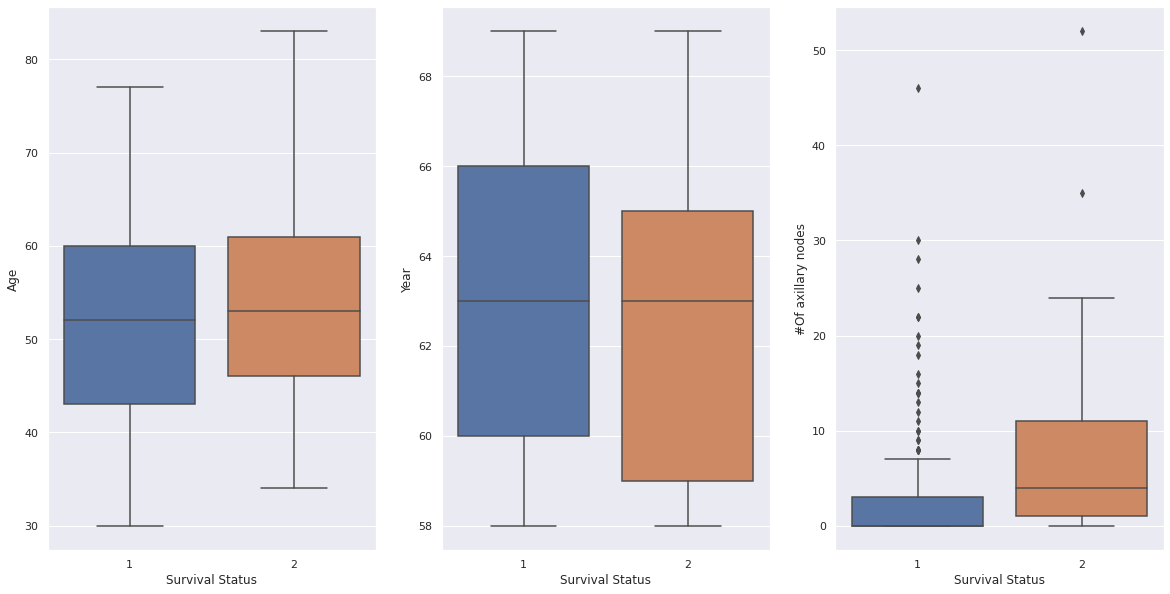

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x="Survival Status", y="Age", data=df)

plt.subplot(1,3,2)
sns.boxplot(x="Survival Status", y="Year", data=df)

plt.subplot(1,3,3)
sns.boxplot(x="Survival Status", y="#Of axillary nodes", data=df)
plt.show()

*  The box plot tells you about the percentiles and it helps to find outliers.
*  It has quartiles 25%, 50%, 75%, 100% as Q1, Q2, Q3, Q4
*  The midle line in the box is the 50th percentile and above the middle line is 75 percentile and below the middle line is the 25th percentile.
*  The vertical lines in each box plot are called whiskers. whskers are plotted based on the IQR(Inter Quartile range) i.e. Q3-Q1.
*  The lower whisker(Q1) = 1.5 * IQR where as Q4 = Q3+1.5*IQR 
*  Q2 is the median
*  Outliers are represented as dots outside the whiskers

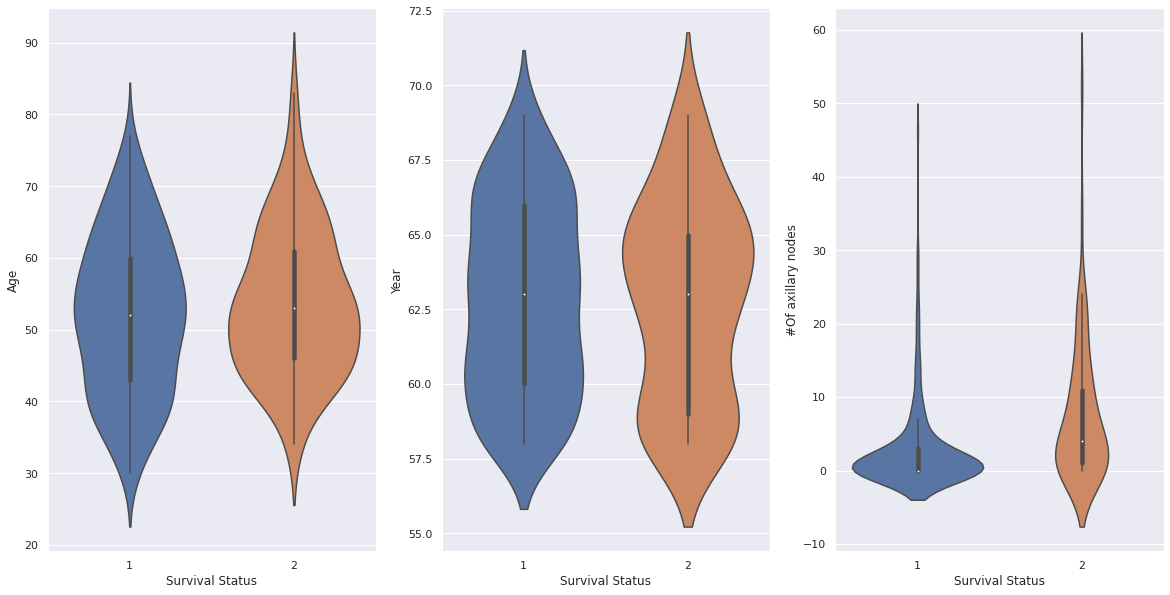

In [18]:
# The violin plot combnes both histogram and boxplot.
# The Denser regions are fatter and sparser regions are thinner
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.violinplot(x="Survival Status", y="Age", data=df)
plt.subplot(1, 3, 2)
sns.violinplot(x="Survival Status", y="Year", data=df)
plt.subplot(1, 3, 3)
sns.violinplot(x="Survival Status", y="#Of axillary nodes", data=df)
plt.show()